In [ ]:
'''
题目：寻找关键用户和分析社交关系
data.json 数据描述
1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：

节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...
'''

In [112]:
import json
import networkx as nx
import matplotlib.pyplot as plt
# 1.a 使用字典表示法表示这个社交关系网络
with open('hw4_data.json') as f:
    data = json.load(f)
G = nx.Graph()
for node in data['nodes']:
    G.add_node(node[0], influence=node[1])
for edge in data['edges']:
    G.add_edge(edge[0], edge[1], weight=edge[2])

In [113]:
# 1.b 找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出
friends_list = {user: [] for user, _ in data['nodes']}
for edge in data['edges']:
    user1, user2, _ = edge
    friends_list[user1].append(user2)
    friends_list[user2].append(user1)
for friend in friends_list:
    print(f"user {friend}'s direct friends are: {friends_list[friend]}")

user Yanyan-Wang's direct friends are: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
user Aarebecca's direct friends are: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
user pomelo-nwu's direct friends are: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
user tyn1998's direct friends are: ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry

In [114]:
# 2.a 找出度数最多的前5个用户
degrees = dict(G.degree())
top_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
top_degrees[:5]

[('tyn1998', 30),
 ('frank-zsy', 30),
 ('pomelo-nwu', 24),
 ('andyhuang18', 23),
 ('wj23027', 23)]

In [115]:
# 2.b 找出影响力最高的前5个用户
top_influence = sorted(G.nodes(data=True), key=lambda x: x[1]['influence'], reverse=True)
top_influence[:5]

[('Yanyan-Wang', {'influence': 50.95}),
 ('Aarebecca', {'influence': 23.82}),
 ('pomelo-nwu', {'influence': 22.36}),
 ('tyn1998', {'influence': 16.64}),
 ('frank-zsy', {'influence': 15.8})]

In [116]:
# 2.c 综合考虑影响力分数和朋友数量，列出对社交网络最有综合影响力的用户（将两者按影响力得分的50%和朋友数量的50%加权）
influence_scores = {node: G.nodes[node]['influence'] for node in G.nodes()}
influence = {user: (influence_scores[user] * 0.5) + (degrees[user] * 0.5) for user in G.nodes()}
top_users = sorted(influence.items(), key=lambda x: x[1], reverse=True)
top_users[:10]

[('Yanyan-Wang', 32.475),
 ('tyn1998', 23.32),
 ('pomelo-nwu', 23.18),
 ('frank-zsy', 22.9),
 ('Aarebecca', 17.41),
 ('will-ww', 15.25),
 ('andyhuang18', 14.635),
 ('wj23027', 13.28),
 ('Zzzzzhuzhiwei', 13.105),
 ('zhicheng-ning', 12.675)]

In [117]:
# 3.a 对于用户 Yanyan-Wang，找出其“朋友的朋友”中最有可能成为新朋友（有最多共同的朋友）的用户
yanyan_friends = set(friends_list["Yanyan-Wang"])
potential_friends = {}
for friend in yanyan_friends:
    friend_friends = set(friends_list[friend])
    friend_friends.remove("Yanyan-Wang")
    common_friends_count = len(yanyan_friends & friend_friends)
    for pf in friend_friends:
        if pf in yanyan_friends:
            continue
        if pf not in potential_friends:
            potential_friends[pf] = 0
        potential_friends[pf] += common_friends_count
most_common_friend = sorted((potential_friends).items(), key=lambda x: x[1], reverse=True)
most_common_friend[:10]

[('Zzzzzhuzhiwei', 57),
 ('lhbvvvvv', 57),
 ('zhaosj975', 57),
 ('longyanz', 57),
 ('will-ww', 57),
 ('zhicheng-ning', 57),
 ('xiaoya-yaya', 57),
 ('birdflyi', 57),
 ('xgdyp', 57),
 ('PureNatural', 57)]

In [118]:
# 3.b 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
edges_with_yanyan = [(u, v, d['weight']) for u, v, d in G.edges(data=True) if u == "Yanyan-Wang" or v == "Yanyan-Wang"]
sorted_edges = sorted(edges_with_yanyan, key=lambda x: x[2], reverse=True)
[(user , _) for u, user, _ in sorted_edges][:5]

[('Aarebecca', 25.3),
 ('pomelo-nwu', 25.09),
 ('yangzy0603', 11.85),
 ('tyn1998', 9.62),
 ('yvonneyx', 7.39)]

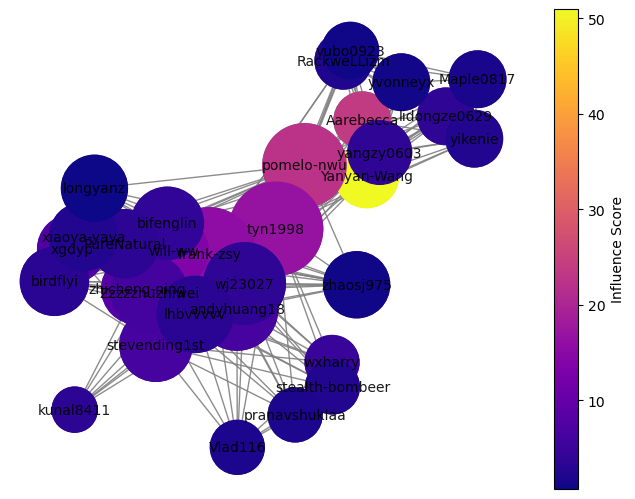

In [119]:
# 4.a 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
# 4.b 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。
node_size = [G.degree[node] * 150 for node in G]  
node_color = [G.nodes[node]['influence'] for node in G]  
pos = nx.spring_layout(G,k=0.03)  
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color=node_color, font_size=10, alpha=0.9, cmap=plt.get_cmap('viridis'), edge_color='gray')
plt.colorbar(nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, cmap=plt.get_cmap('plasma')), label='Influence Score')
plt.show()